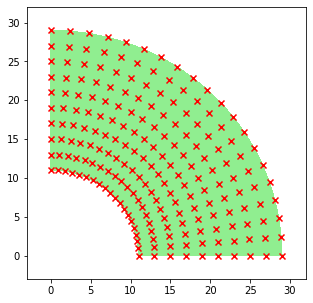

In [7]:

import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
# Preaper training data (input)
l1, l2 = 20, 10
t = np.linspace(0, np.pi/2, 20)
l = np.arange(l1 - l2 + 1, l1 + l2 + 1, 2)
X = l.reshape(-1,1) @ np.cos(t.reshape(1,-1))
Y = l.reshape(-1,1) @ np.sin(t.reshape(1,-1))
# prepare training data (output)
theta2 = np.arccos((X.ravel()**2 + Y.ravel()**2 -\
l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(Y.ravel()/X.ravel()) - \
np.arctan(l2*np.sin(theta2)/(l1+l2*np.cos(theta2)))
# setup for ANN training
InputX = np.c_[X.ravel(), Y.ravel()]
OutputY = np.c_[theta1, theta2]
hidden_layers = (10, )
solver = 'lbfgs' 
mlp_reg = MLPRegressor(max_iter = 8000, solver = solver,
hidden_layer_sizes = hidden_layers, verbose = False,
activation = 'logistic', # default activation = ’relu’
tol=1e-6, random_state = 0)
mlp_reg.fit(InputX, OutputY) 
OutputY_hat = mlp_reg.predict(InputX) 
theta1_hat, theta2_hat = OutputY_hat[:,0], OutputY_hat[:,1]
# convert to (x,y) positions
x_hat = l1 * np.cos(theta1_hat) + \
l2 * np.cos(theta1_hat+theta2_hat)
y_hat = l1 * np.sin(theta1_hat) + \
l2 * np.sin(theta1_hat+theta2_hat)
rmse = np.sqrt(mean_squared_error(OutputY, OutputY_hat))
fig = plt.figure(figsize=(5,5))
plt.contourf(X, Y, theta1.reshape(X.shape), colors='lightgreen')
plt.scatter(X, Y, color='r', marker='x')
plt.xlim(-3, 32)
plt.ylim(-3, 32)
plt.savefig("D:/latex/images/sample1.eps", format="eps", dpi=300)

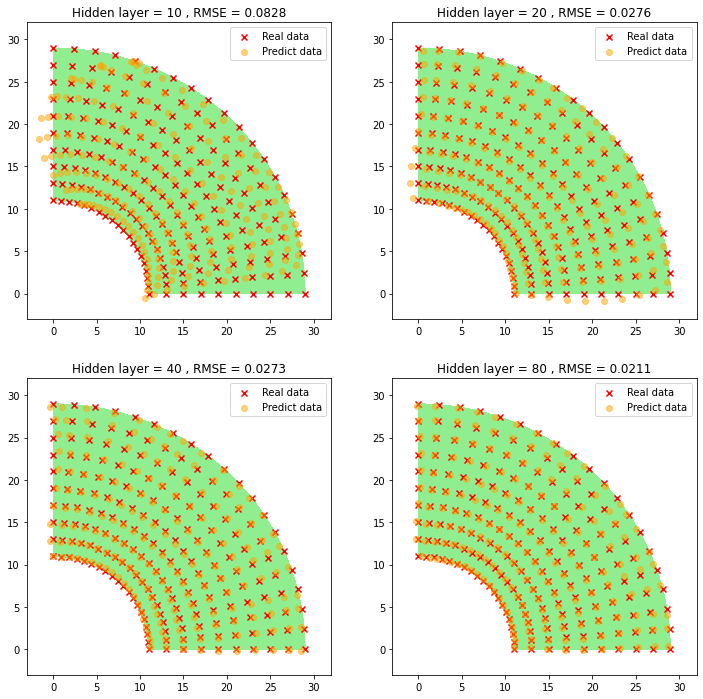

In [8]:
import matplotlib.pyplot as plt
hidden_layers = [(10), (20), (40), (80)]
rmses = []

fig, ax = plt.subplots(2, 2, figsize=(12, 12))

for i, hidden_layer in enumerate(hidden_layers):
    mlp_reg = MLPRegressor(max_iter=8000, solver='lbfgs', hidden_layer_sizes=hidden_layer, verbose=False,
                           activation='logistic', tol=1e-6, random_state=4)
    mlp_reg.fit(InputX, OutputY)  
    OutputY_hat = mlp_reg.predict(InputX) 
    theta1_hat, theta2_hat = OutputY_hat[:, 0], OutputY_hat[:, 1]

    x_hat = l1 * np.cos(theta1_hat) + l2 * np.cos(theta1_hat + theta2_hat)
    y_hat = l1 * np.sin(theta1_hat) + l2 * np.sin(theta1_hat + theta2_hat)

    rmse = np.sqrt(mean_squared_error(OutputY, OutputY_hat))
    rmses.append(rmse)

    row = i // 2
    col = i % 2

    ax[row][col].contourf(X, Y, theta1.reshape(X.shape), colors='lightgreen')
    ax[row][col].scatter(X, Y, color='r', marker='x', label='Real data')
    ax[row][col].scatter(x_hat, y_hat, color='orange', marker='o', alpha=0.5, label='Predict data')
    ax[row][col].set_xlim(-3, 32)
    ax[row][col].set_ylim(-3, 32)
    ax[row][col].set_title(f'Hidden layer = {hidden_layer} , RMSE = {rmse:.4f}')
    ax[row][col].legend()
plt.savefig("D:/latex/images/arm.png", format="png", dpi=300)

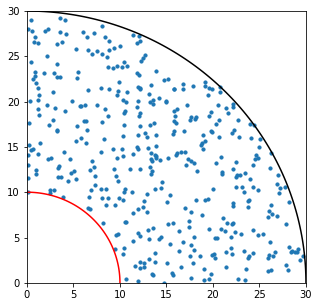

In [9]:
from scipy.stats import uniform
import numpy as np
import matplotlib.pyplot as plt
radius_in, radius_out =10, 30
X = uniform.rvs(loc = 0, scale = radius_out, size=(600, 2))
d = np.sqrt(X[:, 0] ** 2 + X[:, 1] ** 2)
Idx = (d < radius_out) & (d > radius_in)
TrainData = X[(d < radius_out) & (d > radius_in), :]

theta = np.linspace(0, np.pi / 2, 100)
radius1,radius2 = 10, 30
z1,z3 = radius1 * np.cos(theta),radius2 * np.cos(theta)
z2, z4 = radius1 * np.sin(theta), radius2 * np.sin(theta)
plt.figure(figsize=(5, 5))
plt.scatter(TrainData[:,0],TrainData[:,1],s=10)
plt.plot(z1,z2,color='red')
plt.plot(z3,z4,color='black')
plt.xlim([0,30])
plt.ylim([0,30])
plt.savefig("D:/latex/images/armrange.eps", format="eps", dpi=300)

In [10]:
import numpy as np
from scipy.special import gammainc

def randsphere(center, radius, n_per_sphere):
    r = radius
    ndim = center.size
    x = np.random.normal(size=(n_per_sphere, ndim))
    ssq = np.sum(x ** 2, axis=1)
    fr = r * gammainc(ndim / 2, ssq / 2) ** (1 / ndim) / np.sqrt(ssq)
    frtiled = np.tile(fr.reshape(n_per_sphere, 1), (1, ndim))
    p = center + np.multiply(x, frtiled)
    return p

p = randsphere(np.array([0, 0]), 30, 1000)
p = p[(p[:,0] > 0) & (p[:,1] > 0), :] # 第一象限
d = np.sum(p**2, axis=1)
p = p[d >= radius_in**2, :] 

In [11]:
import neurolab as nl
from sklearn.model_selection import train_test_split
l1, l2 = 20, 10
x=p[:,0]
y=p[:,1]
x_train, x_test, y_train, y_test = train_test_split(x ,y ,test_size=0.3)

theta2 = np.arccos((x_train.ravel()**2 + y_train.ravel()**2 -\
l1**2 - l2**2)/(2*l1*l2))
theta1= np.arctan(y_train.ravel()/x_train.ravel()) - \
np.arctan(l2*np.sin(theta2)/(l1+l2*np.cos(theta2)))

theta2_test = np.arccos((x_test.ravel()**2 + y_test.ravel()**2 -\
l1**2 - l2**2)/(2*l1*l2))
theta1_test = np.arctan(y_test.ravel()/x_test.ravel()) - \
np.arctan(l2*np.sin(theta2_test)/(l1+l2*np.cos(theta2_test)))

InputX = np.c_[x_train, y_train] # inputs: N x 2
predictX = np.c_[x_test, y_test]
OutputY = np.c_[theta1, theta2] 
OutputY_test = np.c_[theta1_test, theta2_test] 
# output: N x 2
x1=p[:,0]
x2=p[:,1]
hidden_output_layers = [20, 2]#[hidden layers,output layer]
# set up activation functions for each hidden layer and output layer
transf = [nl.trans.TanSig(), nl.trans.PureLin()]
net = nl.net.newff([[x1.min(), x1.max()], [x2.min(), x2.max()]],
size = hidden_output_layers, transf = transf)
#set up traning func
net.trainf = nl.train.train_bfgs
epochs = 800
# errors = []  # 用於儲存每個 epoch 的誤差值

# for epoch in range(1, epochs ):  # 執行 300 次 epochs
#     error = net.train(InputX, OutputY, epochs=1, show=0, goal=0.01)
#     if epoch >= 10:  # 只有在第五次 epoch 或更後面的 epoch 才儲存誤差值
#         errors.append(error)  # 將每次訓練後的誤差值添加到列表中
plt.plot(range(10, len(errors)+10), errors)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Error vs Epoch')
plt.savefig("D:/latex/images/curve.eps", format="eps", dpi=300)
plt.show()



NameError: name 'errors' is not defined

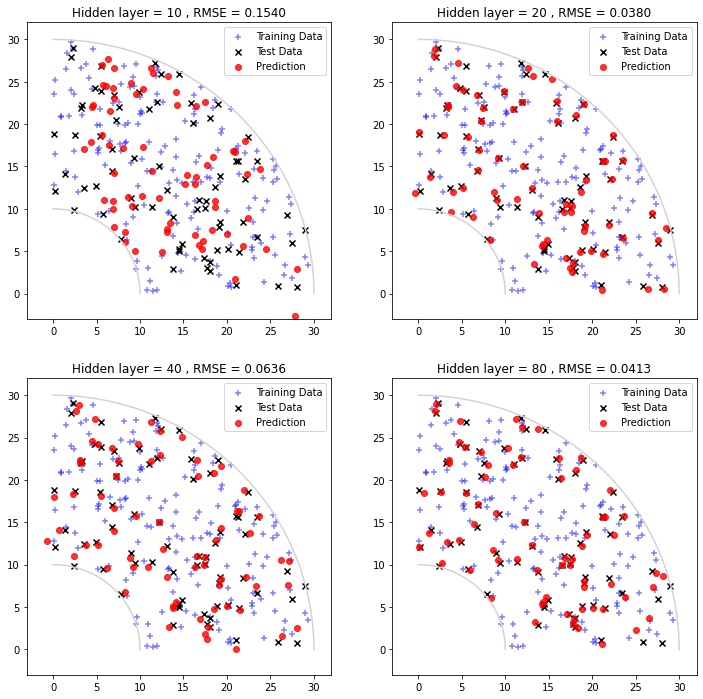

In [ ]:
hidden_layers = [(10), (20), (40), (80)]
rmses = []

fig, ax = plt.subplots(2, 2, figsize=(12, 12))

for i, hidden_layer in enumerate(hidden_layers):
    mlp_reg = MLPRegressor(max_iter=8000, solver='lbfgs', hidden_layer_sizes=hidden_layer, verbose=False,
                           activation='logistic', tol=1e-6, random_state=4)
    mlp_reg.fit(InputX, OutputY)  
    OutputY_hat = mlp_reg.predict(InputX) 
    Ytest = mlp_reg.predict(predictX) 
    # theta1_hat, theta2_hat = OutputY_hat[:, 0], OutputY_hat[:, 1]
    theta1_test_pre, theta2_test_pre = Ytest[:, 0], Ytest[:, 1]

    # x_hat = l1 * np.cos(theta1_hat) + l2 * np.cos(theta1_hat + theta2_hat)
    # y_hat = l1 * np.sin(theta1_hat) + l2 * np.sin(theta1_hat + theta2_hat)

    xtest_hat = l1 * np.cos(theta1_test_pre) + l2 * np.cos(theta1_test_pre + theta2_test_pre)
    ytest_hat = l1 * np.sin(theta1_test_pre) + l2 * np.sin(theta1_test_pre + theta2_test_pre)
    rmse = np.sqrt(mean_squared_error(OutputY_test, Ytest))
    rmses.append(rmse)

    row = i // 2
    col = i % 2

    ax[row][col].scatter(x_train, y_train, color='b', marker='+', alpha=0.5,label='Training Data')
    ax[row][col].scatter(x_test, y_test, color='black', marker='x', label='Test Data')
    ax[row][col].scatter(xtest_hat, ytest_hat, color='red', marker='o', alpha=0.8, label='Prediction')
    ax[row][col].set_xlim(-3, 32)
    ax[row][col].set_ylim(-3, 32)
    ax[row][col].set_title(f'Hidden layer = {hidden_layer} , RMSE = {rmse:.4f}')
    ax[row][col].legend()

    theta = np.linspace(0, np.pi / 2, 100)
    radius1,radius2 = 10, 30
    z1,z3 = radius1 * np.cos(theta),radius2 * np.cos(theta)
    z2, z4 = radius1 * np.sin(theta), radius2 * np.sin(theta)
    ax[row][col].plot(z1,z2,color='lightgray')
    ax[row][col].plot(z3,z4,color='lightgray')
plt.savefig("D:/latex/images/rdarm.png", format="png", dpi=300)
plt.show()


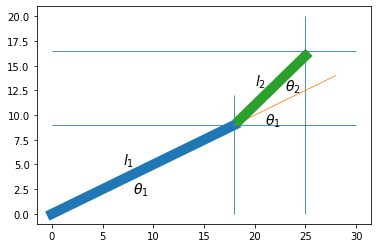

In [ ]:
k1 = np.linspace(0,18,100)
k1_sec = np.linspace(18,28,100)
k2 = np.linspace(18.5,25,100)
k1y,k1y_sec = k1*1/2, k1_sec*1/2
k2y = k2- 9
plt.plot(k1,k1y,linewidth=10)
plt.plot(k1_sec,k1y_sec,linewidth=0.8)
plt.plot(k2,k2y,linewidth=10)
plt.hlines(y=9,xmin=0,xmax=30,linewidth=0.8)
plt.hlines(y=16.5,xmin=0,xmax=30,linewidth=0.8)
plt.vlines(x=18,ymin=0,ymax=12,linewidth=0.8)
plt.vlines(x=25,ymin=0,ymax=20,linewidth=0.8)
plt.text(8,2,'$\\theta_1$', fontsize=14)
plt.text(21,9,'$\\theta_1$', fontsize=14)
plt.text(23,12.5,'$\\theta_2$', fontsize=14)
plt.text(7,5,'$l_1$', fontsize=14)
plt.text(20,13,'$l_2$', fontsize=14)
plt.savefig("D:/latex/images/armshow.eps", format="eps", dpi=300)
plt.show()

In [ ]:
import numpy as np
from scipy.special import gammainc
p2 = randsphere(np.array([0, 0]), 30, 1000)
p2 = p2[(p2[:,0] > 0) & (p2[:,1] > 0), :] # 第一象限
d2 = np.sum(p2**2, axis=1)
p2 = p2[d2 >= radius_in**2, :] 

x=p2[:,0]
y=p2[:,1]
x_train, x_test, y_train, y_test = train_test_split(x ,y ,test_size=0.3)

theta2 = np.arccos((x_train.ravel()**2 + y_train.ravel()**2 -\
l1**2 - l2**2)/(2*l1*l2))
theta1= np.arctan(y_train.ravel()/x_train.ravel()) - \
np.arctan(l2*np.sin(theta2)/(l1+l2*np.cos(theta2)))

theta2_test = np.arccos((x_test.ravel()**2 + y_test.ravel()**2 -\
l1**2 - l2**2)/(2*l1*l2))
theta1_test = np.arctan(y_test.ravel()/x_test.ravel()) - \
np.arctan(l2*np.sin(theta2_test)/(l1+l2*np.cos(theta2_test)))

InputX = np.c_[x_train, y_train] # inputs: N x 2
predictX = np.c_[x_test, y_test]
OutputY = np.c_[theta1, theta2] 
OutputY_test = np.c_[theta1_test, theta2_test] 

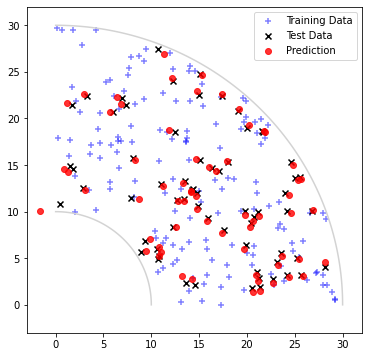

In [ ]:
mlp_reg = MLPRegressor(max_iter=8000, solver='lbfgs', hidden_layer_sizes=20, verbose=False,
                           activation='logistic', tol=1e-6, random_state=4)
mlp_reg.fit(InputX, OutputY)  
OutputY_hat = mlp_reg.predict(InputX) 
Ytest = mlp_reg.predict(predictX) 
# theta1_hat, theta2_hat = OutputY_hat[:, 0], OutputY_hat[:, 1]
theta1_test_pre, theta2_test_pre = Ytest[:, 0], Ytest[:, 1]

# x_hat = l1 * np.cos(theta1_hat) + l2 * np.cos(theta1_hat + theta2_hat)
# y_hat = l1 * np.sin(theta1_hat) + l2 * np.sin(theta1_hat + theta2_hat)

xtest_hat = l1 * np.cos(theta1_test_pre) + l2 * np.cos(theta1_test_pre + theta2_test_pre)
ytest_hat = l1 * np.sin(theta1_test_pre) + l2 * np.sin(theta1_test_pre + theta2_test_pre)
rmse = np.sqrt(mean_squared_error(OutputY_test, Ytest))
# rmses.append(rmse)
plt.figure(figsize=(6,6))
plt.scatter(x_train, y_train, color='b', marker='+', alpha=0.5,label='Training Data')
plt.scatter(x_test, y_test, color='black', marker='x', label='Test Data')
plt.scatter(xtest_hat, ytest_hat, color='red', marker='o', alpha=0.8, label='Prediction')
plt.xlim(-3, 32)
plt.ylim(-3, 32)
# plt.title(f'n = 239, RMSE = {rmse:.4f}')
plt.legend()

theta = np.linspace(0, np.pi / 2, 100)
radius1,radius2 = 10, 30
z1,z3 = radius1 * np.cos(theta),radius2 * np.cos(theta)
z2, z4 = radius1 * np.sin(theta), radius2 * np.sin(theta)
plt.plot(z1,z2,color='lightgray')
plt.plot(z3,z4,color='lightgray')
plt.savefig("D:/latex/images/2n239.png", format="png", dpi=300)

Epoch: 100; Error: 0.10978435672112995;
Epoch: 200; Error: 0.03812272514765052;
Epoch: 300; Error: 0.02480749554529847;
Epoch: 400; Error: 0.019771552214537802;
Epoch: 500; Error: 0.015443592815464783;
Epoch: 600; Error: 0.01238280357931696;
Epoch: 700; Error: 0.010430400287191739;
The goal of learning is reached


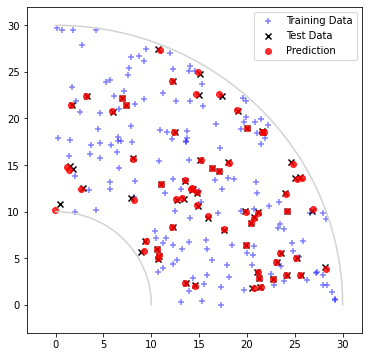

In [ ]:
import neurolab as nl
from sklearn.model_selection import train_test_split
l1, l2 = 20, 10
x=p[:,0]
y=p[:,1]
x_train, x_test, y_train, y_test = train_test_split(x ,y ,test_size=0.3)

theta2 = np.arccos((x_train.ravel()**2 + y_train.ravel()**2 -\
l1**2 - l2**2)/(2*l1*l2))
theta1= np.arctan(y_train.ravel()/x_train.ravel()) - \
np.arctan(l2*np.sin(theta2)/(l1+l2*np.cos(theta2)))

theta2_test = np.arccos((x_test.ravel()**2 + y_test.ravel()**2 -\
l1**2 - l2**2)/(2*l1*l2))
theta1_test = np.arctan(y_test.ravel()/x_test.ravel()) - \
np.arctan(l2*np.sin(theta2_test)/(l1+l2*np.cos(theta2_test)))

InputX = np.c_[x_train, y_train] # inputs: N x 2
predictX = np.c_[x_test, y_test]
OutputY = np.c_[theta1, theta2] 
OutputY_test = np.c_[theta1_test, theta2_test] 
# output: N x 2
x1=p[:,0]
x2=p[:,1]
hidden_output_layers = [20, 2]#[hidden layers,output layer]
# set up activation functions for each hidden layer and output layer
transf = [nl.trans.TanSig(), nl.trans.PureLin()]
net = nl.net.newff([[x1.min(), x1.max()], [x2.min(), x2.max()]],
size = hidden_output_layers, transf = transf)
#set up traning func
net.trainf = nl.train.train_bfgs
epochs = 800
# errors = []  # 用於儲存每個 epoch 的誤差值
net.train(InputX, OutputY, epochs=epochs, show=100, goal=0.01)
# for epoch in range(1, epochs ):  # 執行 300 次 epochs
#     error = net.train(InputX, OutputY, epochs=1, show=0, goal=0.01)
#     if epoch >= 10:  # 只有在第五次 epoch 或更後面的 epoch 才儲存誤差值
#         errors.append(error)  # 將每次訓練後的誤差值添加到列表中

OutputY_hat = net.sim(InputX)
Ytest = net.sim(predictX) 
# theta1_hat, theta2_hat = OutputY_hat[:, 0], OutputY_hat[:, 1]
theta1_test_pre, theta2_test_pre = Ytest[:, 0], Ytest[:, 1]

# x_hat = l1 * np.cos(theta1_hat) + l2 * np.cos(theta1_hat + theta2_hat)
# y_hat = l1 * np.sin(theta1_hat) + l2 * np.sin(theta1_hat + theta2_hat)

xtest_hat = l1 * np.cos(theta1_test_pre) + l2 * np.cos(theta1_test_pre + theta2_test_pre)
ytest_hat = l1 * np.sin(theta1_test_pre) + l2 * np.sin(theta1_test_pre + theta2_test_pre)
rmse = np.sqrt(mean_squared_error(OutputY_test, Ytest))
# rmses.append(rmse)
plt.figure(figsize=(6,6))
plt.scatter(x_train, y_train, color='b', marker='+', alpha=0.5,label='Training Data')
plt.scatter(x_test, y_test, color='black', marker='x', label='Test Data')
plt.scatter(xtest_hat, ytest_hat, color='red', marker='o', alpha=0.8, label='Prediction')
plt.xlim(-3, 32)
plt.ylim(-3, 32)
plt.legend()

theta = np.linspace(0, np.pi / 2, 100)
radius1,radius2 = 10, 30
z1,z3 = radius1 * np.cos(theta),radius2 * np.cos(theta)
z2, z4 = radius1 * np.sin(theta), radius2 * np.sin(theta)
plt.plot(z1,z2,color='lightgray')
plt.plot(z3,z4,color='lightgray')
plt.savefig("D:/latex/images/neu.png", format="png", dpi=300)

In [ ]:
net.train(InputX, OutputY, epochs=800, show=100, goal=0.01)
# plt.plot(range(1, len(ea)+1), ea)
# plt.xlabel('Epoch')
# plt.ylabel('Error')
# plt.title('Error vs Epoch')
# plt.savefig("D:/latex/images/curve.eps", format="eps", dpi=300)
# plt.show()

The goal of learning is reached


[0.009994363861523716]

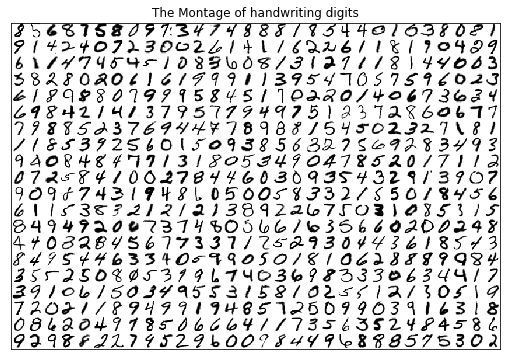

In [12]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
data_dir = 'D:/latex/images/'
D = loadmat(data_dir + 'Digits_train.mat')
# D.keys()
X_pic = D['X'] # images
y_pic = D['y'] # labels: single outpu
plt.figure(figsize = (9,6))
# prepare and diaplay a montage of digit images
n, m = 20, 30 # A n x m montage (total mn images)
sz = np.sqrt(X_pic.shape[1]).astype('int') # image size sz x sz
M = np.zeros((m*sz, n*sz)) # montage image
A = X_pic[:m*n,:] # show the first nm images
# Arrange images to form a montage
for i in range(m) :
    for j in range(n) :
        M[i*sz: (i+1)*sz, j*sz:(j+1)*sz] = \
        A[i*n+j,:].reshape(sz, sz)
plt.imshow(M.T, cmap = plt.cm.gray_r, \
interpolation = 'nearest')
plt.xticks([])
plt.yticks([])
plt.title('The Montage of handwriting digits')
plt.savefig("D:/latex/images/handw.eps", format="eps", dpi=300)
plt.show()

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
# prepare data
X_train, X_test, y_train, y_test = \
train_test_split(X_pic/255, y_pic.ravel(), test_size = 0.25)
# setup and run
hidden_layers = (40,) # one hidden layer
# solver = ’sgd’ # not efficient, need more tuning
# solver = ’lbfgs’ # not suitable here
solver = 'adam' # default solver
clf = MLPClassifier(max_iter = 10000, solver = solver,
hidden_layer_sizes = hidden_layers, verbose = True,
activation = 'logistic', tol = 1e-6, random_state = 0)
# default activation = ’relu’
clf.fit(X_train, y_train)
y_test_hat = clf.predict(X_test)

Iteration 1, loss = 2.31904786
Iteration 2, loss = 2.22452028
Iteration 3, loss = 2.14929544
Iteration 4, loss = 2.08020308
Iteration 5, loss = 2.01321506
Iteration 6, loss = 1.94927922
Iteration 7, loss = 1.88893439
Iteration 8, loss = 1.83043037
Iteration 9, loss = 1.77584999
Iteration 10, loss = 1.72258783
Iteration 11, loss = 1.67226837
Iteration 12, loss = 1.62355409
Iteration 13, loss = 1.57592359
Iteration 14, loss = 1.52996050
Iteration 15, loss = 1.48583769
Iteration 16, loss = 1.44314192
Iteration 17, loss = 1.40202932
Iteration 18, loss = 1.36124997
Iteration 19, loss = 1.32228241
Iteration 20, loss = 1.28445997
Iteration 21, loss = 1.24808287
Iteration 22, loss = 1.21242409
Iteration 23, loss = 1.17804848
Iteration 24, loss = 1.14470161
Iteration 25, loss = 1.11257061
Iteration 26, loss = 1.08132893
Iteration 27, loss = 1.05119779
Iteration 28, loss = 1.02186716
Iteration 29, loss = 0.99372095
Iteration 30, loss = 0.96653096
Iteration 31, loss = 0.94073742
Iteration 32, los

<Figure size 576x576 with 0 Axes>

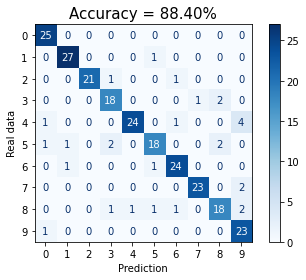

In [41]:

from sklearn.metrics import ConfusionMatrixDisplay
# Confusion matrix
fig = plt.figure(figsize = (8, 8))  
title = 'Accuracy = {:.2f}%'.format(100*clf.score(X_test, y_test))
# 進行混淆矩陣的計算
disp = ConfusionMatrixDisplay.from_estimator(
    clf, # 分類器
    X_test, # 測試資料
    y_test, # 測試資料的標籤
    cmap=plt.cm.Blues, # 顏色
    # normalize='true', # 正規化
) # disp 為 ConfusionMatrixDisplay 物件
disp.ax_.set_title(title, fontsize = 15) # 設定圖表標題
disp.ax_.set_xlabel('Prediction', fontsize = 10) # 設定x軸標籤
disp.ax_.set_ylabel('Real data', fontsize = 10) # 設定y軸標籤
plt.savefig('D:/latex/images/confusionmatrix_2.png', dpi = 300)

plt.show() # 顯示圖表

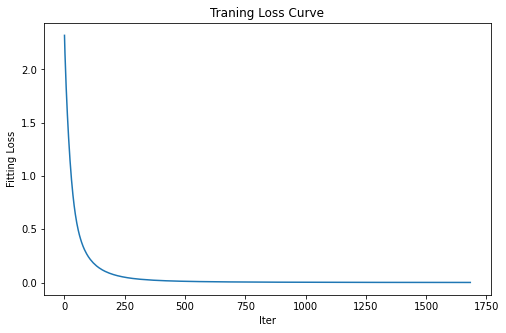

In [42]:
plt.figure(figsize = (8, 5))  
plt.plot(clf.loss_curve_)
plt.title('Traning Loss Curve')
plt.xlabel('Iter')
plt.ylabel('Fitting Loss')
plt.savefig('D:/latex/images/loss_2.png', dpi = 300)

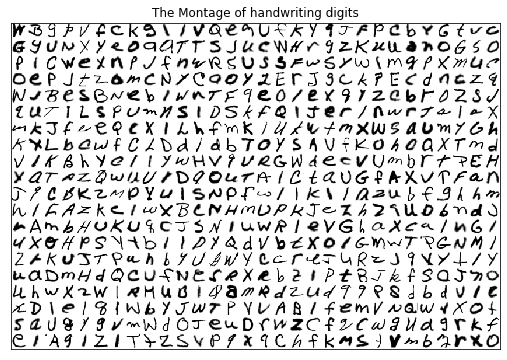

In [55]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
data_dir = 'D:/latex/images/'
D = loadmat(data_dir + 'Letters_train.mat')
# D.keys()
X_pic = D['X'] # images
y_pic = D['y'] # labels: single outpu
plt.figure(figsize = (9,6))
# prepare and diaplay a montage of digit images
n, m = 20, 30 # A n x m montage (total mn images)
sz = np.sqrt(X_pic.shape[1]).astype('int') # image size sz x sz
M = np.zeros((m*sz, n*sz)) # montage image
A = X_pic[:m*n,:] # show the first nm images
# Arrange images to form a montage
for i in range(m) :
    for j in range(n) :
        M[i*sz: (i+1)*sz, j*sz:(j+1)*sz] = \
        A[i*n+j,:].reshape(sz, sz)
plt.imshow(M.T, cmap = plt.cm.gray_r, \
interpolation = 'nearest')
plt.xticks([])
plt.yticks([])
plt.title('The Montage of handwriting digits')
plt.savefig("D:/latex/images/handw2.eps", format="eps", dpi=300)
plt.show()

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
# prepare data
X_train, X_test, y_train, y_test = \
train_test_split(X_pic/255, y_pic.ravel(), test_size = 0.25)
# setup and run
hidden_layers = (40,) # one hidden layer
# solver = ’sgd’ # not efficient, need more tuning
# solver = ’lbfgs’ # not suitable here
solver = 'adam' # default solver
clf = MLPClassifier(max_iter = 10000, solver = solver,
hidden_layer_sizes = hidden_layers, verbose = True,
activation = 'logistic', tol = 1e-6, random_state = 0)
# default activation = ’relu’
clf.fit(X_train, y_train)
y_test_hat = clf.predict(X_test)

Iteration 1, loss = 3.14790341
Iteration 2, loss = 2.89154959
Iteration 3, loss = 2.66572262
Iteration 4, loss = 2.45839602
Iteration 5, loss = 2.27339927
Iteration 6, loss = 2.11145893
Iteration 7, loss = 1.97274896
Iteration 8, loss = 1.85555832
Iteration 9, loss = 1.75591157
Iteration 10, loss = 1.67014972
Iteration 11, loss = 1.59671837
Iteration 12, loss = 1.53121185
Iteration 13, loss = 1.47402213
Iteration 14, loss = 1.42358677
Iteration 15, loss = 1.37893824
Iteration 16, loss = 1.33824840
Iteration 17, loss = 1.30018935
Iteration 18, loss = 1.26692030
Iteration 19, loss = 1.23561873
Iteration 20, loss = 1.20606712
Iteration 21, loss = 1.18004011
Iteration 22, loss = 1.15554027
Iteration 23, loss = 1.13121925
Iteration 24, loss = 1.10890427
Iteration 25, loss = 1.08868153
Iteration 26, loss = 1.06831198
Iteration 27, loss = 1.05132477
Iteration 28, loss = 1.03233180
Iteration 29, loss = 1.01610804
Iteration 30, loss = 0.99992461
Iteration 31, loss = 0.98452636
Iteration 32, los

<Figure size 576x576 with 0 Axes>

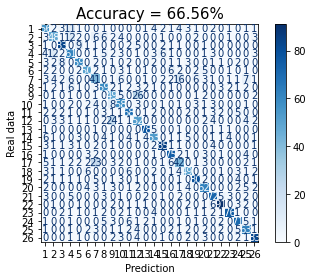

In [54]:
from sklearn.metrics import ConfusionMatrixDisplay
# Confusion matrix
fig = plt.figure(figsize = (8, 8))  
title = 'Accuracy = {:.2f}%'.format(100*clf.score(X_test, y_test))
# 進行混淆矩陣的計算
disp = ConfusionMatrixDisplay.from_estimator(
    clf, # 分類器
    X_test, # 測試資料
    y_test, # 測試資料的標籤
    cmap=plt.cm.Blues, # 顏色
    # normalize='true', # 正規化
) # disp 為 ConfusionMatrixDisplay 物件
disp.ax_.set_title(title, fontsize = 15) # 設定圖表標題
disp.ax_.set_xlabel('Prediction', fontsize = 10) # 設定x軸標籤
disp.ax_.set_ylabel('Real data', fontsize = 10) # 設定y軸標籤
plt.savefig('D:/latex/images/confusionmatrix_4.png', dpi = 300)

plt.show() # 顯示圖表

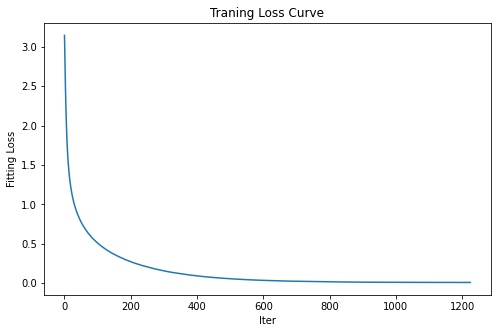

In [47]:
plt.figure(figsize = (8, 5))  
plt.plot(clf.loss_curve_)
plt.title('Traning Loss Curve')
plt.xlabel('Iter')
plt.ylabel('Fitting Loss')
plt.savefig('D:/latex/images/loss_3.eps', dpi = 300)